# AI-Based Cat Emotion Detector Iteration 1
**Author:** Anh Huynh

**Class:** AI4 – RB01

**Semester Coach:** Mrs. Priyanka Darbari

## Project Objective

This project centers on building a **machine learning model to identify cat emotions—angry, happy, and sad—through image data**. The goal is to offer pet owners a practical tool for better understanding their cats’ emotional states using classical machine learning techniques like **Support Vector Machines (SVM)** and **Random Forest** models. The work follows the **ICT & AI project methodology**, moving through the stages of proposal, provisioning, predictions, and delivery with a structured approach.

## Summary of Iteration 0

Iteration 0 laid the groundwork for the CatEmotionDetector project, setting the stage for further development:

- **Data Collection**: Two Roboflow datasets were gathered:
  - *Cat Emotions.v1-test.folder* (CATS team, 2023), with around 670 images.
  - *Cat Emotions.v2i.folder* (Cat Emotion Classification, 2024), with roughly 2,000 images.
  - These were filtered to focus on happy, sad, and angry emotions, resulting in 369 images (98 happy, 132 sad, 139 angry).

- **Data Preparation**:
  - The imbalance was tackled by augmenting the happy class to 150 images through techniques like flips, rotations, and brightness adjustments.
  - An attempt to use SMOTE to balance the dataset to 200 images per class (600 total) was made, but the resulting synthetic images were blurry and not suitable for training.
  - Enhanced augmentation, including crops and GammaContrast, was then applied to create a balanced dataset of 600 images (200 per class).
  - Images were preprocessed by extracting HOG features from 64x64 grayscale images, reducing dimensionality to 648 features per image.

- **Modeling**:
  - A linear kernel SVM initially yielded 46% accuracy, with no improvement after tuning the C parameter.
  - Switching to an RBF kernel SVM (C=10, gamma=0.1) boosted accuracy to 68%.
  - The happy class performed strongly (recall 0.85), while the sad class saw notable improvement (recall from 40% to 62%).

- **Next Steps**: The iteration closed with plans to compare SVM with a Random Forest model, gather more diverse data, and incorporate teacher feedback to guide improvements.

## What's in This Notebook

### What
**Iteration 1** builds on the foundation of Iteration 0, focusing on **refining the project through targeted improvements**. Additional data is collected to **expand the dataset** and address previous limitations in size and diversity. The notebook **examines the quality of the existing datasets** by analyzing differences between the data sources and checking the authenticity of all images to spot any artificial modifications. **Image preprocessing** is carefully structured, covering techniques like resizing, normalization, and HOG feature extraction, while edge detection is applied to explore facial features essential for emotion detection, with its results and analysis presented. **The SVM with an RBF kernel** is retrained, and a **Random Forest model** is introduced for **comparison**. Performance is assessed through classification reports and cross-validation, and the notebook concludes with a summary and references.

### Why
The focus is on strengthening the model’s ability to generalize and perform reliably. Iteration 0 highlighted challenges like a small dataset (600 images) and limited diversity in angles, lighting, and breeds, which are being addressed by collecting additional data. These improvements, along with refined preprocessing and modeling, aim to enhance accuracy and ensure the model can handle real-world variations effectively.

### How
This iteration integrates the newly collected data, applies structured preprocessing, and follows the project methodology to ensure a systematic approach. Feedback is carefully incorporated to improve clarity and structure, with evaluations designed to measure the impact of the expanded dataset and the effectiveness of the Random Forest model compared to SVM.

# 1. Data Collection

Phase 2 starts with gathering data that meets the project’s needs: high-quality images labeled as happy, sad, or angry, with diversity in angles, lighting, and breeds. This step ensures the dataset is representative and suitable for training a machine learning model to classify cat emotions.

## 1.1 Defining Data Requirements

The project requires:

- High-quality cat images labeled as happy, sad, or angry.
- Clear labels for supervised learning, focusing only on these three emotions.
- Diverse images in terms of angles, lighting, and breeds to build a robust model.

Any images not matching these emotions will be filtered out, and the datasets will be checked to ensure they meet these criteria.

## 1.2 Collecting the Data

This iteration uses three datasets, combining the two Roboflow datasets from Iteration 0 with a new dataset from Kaggle to increase diversity:

- **Dataset 1**: *[Cat Emotions Computer Vision Project](https://universe.roboflow.com/cats-xofvm/cat-emotions)* (CATS team, 2023), with around 670 images in train and valid folders, including subfolders like surprised, scared, sad, normal, happy, disgusted, and angry. This dataset covers all three target emotions.
- **Dataset 2**: *[Cat Emotions Computer Vision Project](https://universe.roboflow.com/cat-emotion-classification/cat-emotions-cgrxv)* (Cat Emotion Classification, 2024), with about 2,000 images in a train folder, including subfolders such as uncomfortable, sad, relaxed, no clear emotion recognizable, attentive, attentive uncomfortable, angry, and unlabeled. This dataset includes sad and angry but lacks happy.
- **Dataset 3**: *[Pet's Facial Expression Image Dataset](https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset?resource=download)* (Tanwar, 2023), sourced from Kaggle, with images of various animals (dogs, cats, mice, etc.) across emotions like happy, angry, sad, and others. This dataset was manually filtered to include only cat images labeled as happy, sad, or angry, aligning with the project’s requirements.

The datasets are filtered to keep only the happy, sad, and angry classes for cat images. For Dataset 3, manual filtering was performed to exclude non-cat images and emotions outside the target classes. The code below collects the images from all three datasets and combines them into a single dataset for further use.

In [1]:
import os
import pandas as pd

# Paths to datasets
dataset1_path = r"C:\Users\huynh\Desktop\Jupyter\Cat Emotions.v1-test.folder"
dataset2_path = r"C:\Users\huynh\Desktop\Jupyter\Cat Emotions.v2i.folder"
dataset3_path = r"C:\Users\huynh\Desktop\Jupyter\CatDatasetKaggle"

# Target emotions
target_emotions = ['happy', 'sad', 'angry']

# Collect images
image_data = []

def collect_images(base_path, subfolder, emotion_map=None):
    folder_path = os.path.join(base_path, subfolder)
    for emotion in os.listdir(folder_path):
        final_emotion = emotion_map.get(emotion, emotion) if emotion_map else emotion
        if final_emotion.lower() in [e.lower() for e in target_emotions]:
            emotion_path = os.path.join(folder_path, emotion)
            for img_file in os.listdir(emotion_path):
                if img_file.endswith(('.jpg', '.jpeg', '.png')):
                    full_path = os.path.join(emotion_path, img_file)
                    image_data.append({'filename': full_path, 'emotion': final_emotion.lower()})

# Dataset 1: 
collect_images(dataset1_path, 'train')
collect_images(dataset1_path, 'valid')
print("Images from Dataset 1:", len(image_data))

# Dataset 2: 
collect_images(dataset2_path, 'train')
print("Images after adding Dataset 2:", len(image_data))

# Dataset 3: 
collect_images(dataset3_path, '')
print("Total images after adding Dataset 3:", len(image_data))

Images from Dataset 1: 295
Images after adding Dataset 2: 369
Total images after adding Dataset 3: 616


## 1.3 Storing and Naming the Data
The datasets are stored locally on the project device at `C:\Users\huynh\Desktop\Jupyter\`. Since the work is being done individually, 24/7 access is not a concern, making local storage a practical choice. A CSV file named `master_dataset_labels_v2.csv` is created to store metadata, including the `filename` (path) and `emotion` label.

In [3]:
# Save to CSV
df = pd.DataFrame(image_data)
df['emotion'] = df['emotion'].str.lower()
df.to_csv('master_dataset_labels_v2.csv', index=False)

print("First 5 entries in the CSV:")
print(df.head())

First 5 entries in the CSV:
                                            filename emotion
0  C:\Users\huynh\Desktop\Jupyter\Cat Emotions.v1...   angry
1  C:\Users\huynh\Desktop\Jupyter\Cat Emotions.v1...   angry
2  C:\Users\huynh\Desktop\Jupyter\Cat Emotions.v1...   angry
3  C:\Users\huynh\Desktop\Jupyter\Cat Emotions.v1...   angry
4  C:\Users\huynh\Desktop\Jupyter\Cat Emotions.v1...   angry


## 1.4 Data Dictionary

A data dictionary is created to document the dataset’s elements after import, providing a clear reference for the project. The dataset consists of a CSV file with file paths and emotion labels, so the dictionary focuses on these elements.

| Data Element Name | Data Type   | Description                          | Source                     | Quality Standards         | Notes                     |
|-------------------|-------------|--------------------------------------|----------------------------|---------------------------|---------------------------|
| filename          | Text        | File path to the cat image           | Dataset 1, Dataset 2, Dataset 3 | Must be a valid path      | Used to load images       |
| emotion           | Categorical | Emotion expressed by the cat (happy, sad, angry) | Dataset 1, Dataset 2, Dataset 3 | Must be manually verified | Possible mislabeling      |

## 1.5 Reflections on Collection

The updated collection process now includes 616 images: 295 from Dataset 1, 74 from Dataset 2, and 247 from Dataset 3. I find the CSV file helpful for managing the data, as it saves time by not requiring me to reload all the folders each time I work with the images. Dataset 1 offers a balanced mix of happy, sad, and angry, while Dataset 2 only includes sad and angry, a gap that the Kaggle dataset addresses by contributing 247 images across all three emotions. The manual filtering of the Kaggle dataset to include only cat images was quite time-consuming, as I had to sort through images of other animals, but the folder structure ensured the emotion labels were accurate. While 616 images is a step forward, I’m still concerned it might not be enough for SVM and Random Forest models, since research suggests 1,000+ images for better performance. In the next steps, I’ll focus on balancing the classes and increasing the dataset size through augmentation to improve diversity in angles, lighting, and breeds.

# 2. Data Understanding

This section focuses on analyzing the dataset to assess its balance, diversity, and quality, ensuring it aligns with the project’s requirements for a balanced and diverse set of happy, sad, and angry cat images. Exploratory data analysis (EDA) and visualization techniques are applied to gain insights into the data and identify potential issues.

## 2.1 Checking the Balance

The CSV file is loaded to examine the distribution of emotions across the dataset. A pie chart is used to visualize the balance of the happy, sad, and angry classes.

Images per emotion:
emotion
angry    313
sad      178
happy    125
Name: count, dtype: int64


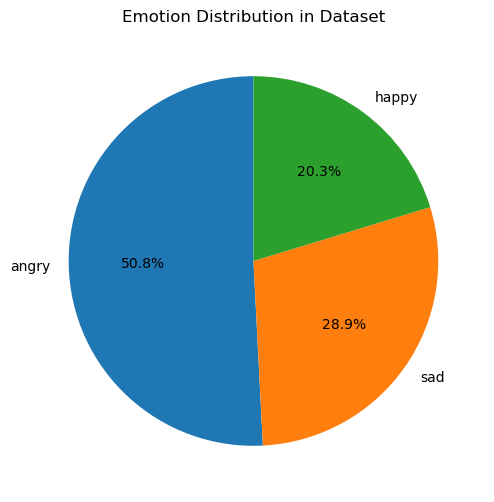

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('master_dataset_labels_v2.csv')

print("Images per emotion:")
print(df['emotion'].value_counts())

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['emotion'].value_counts(), labels=df['emotion'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution in Dataset')
plt.show()

The pie chart shows the distribution: 50.8% angry (313 images), 28.9% sad (178 images), and 20.3% happy (125 images). This indicates a noticeable imbalance, with the happy class being the smallest, which may lead to a bias against detecting happy emotions.

## 2.2 Assessing Diversity

The dataset must be diverse in terms of angles, lighting, and breeds to ensure the model generalizes well. A sample of images from each emotion class is displayed to visually inspect these aspects.

Displaying samples for happy:


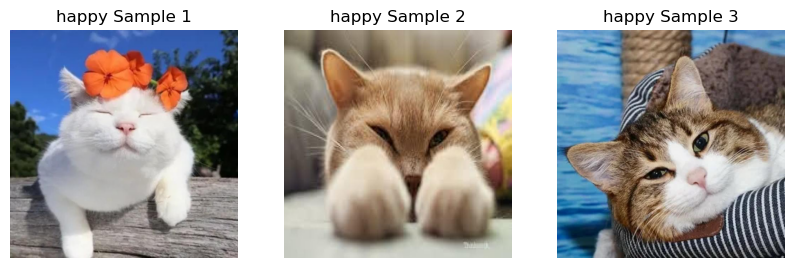

Displaying samples for sad:


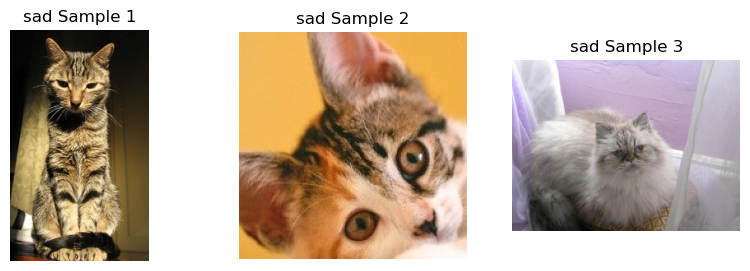

Displaying samples for angry:


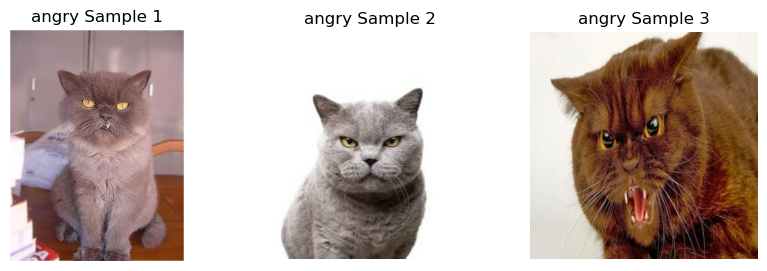

In [20]:
import cv2
import matplotlib.pyplot as plt

# Function to display sample images
def display_samples(emotion, num_samples=3):
    samples = df[df['emotion'] == emotion].sample(num_samples)
    plt.figure(figsize=(10, 3))
    for i, (_, row) in enumerate(samples.iterrows()):
        img = cv2.imread(row['filename'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{emotion} Sample {i+1}")
        plt.axis('off')
    plt.show()

# Display samples for each emotion
for emotion in ['happy', 'sad', 'angry']:
    print(f"Displaying samples for {emotion}:")
    display_samples(emotion)

The sampled images show diversity in angles (front-facing and side profiles), lighting (bright, dim, soft, natural), and breeds (e.g., calico, tabby, gray cats). Happy images often depict cats in relaxed poses, sad images show more neutral or downward expressions, and angry images include more dynamic expressions like open mouths or narrowed eyes. However, some angry images (e.g., Angry Sample 3) appear exaggerated, raising questions about their authenticity.

## 2.3 Quality Check

The quality of the dataset is assessed by checking for missing files, duplicates, and potential issues like blurriness or artificial modifications. Methods to evaluate quality differences between datasets and the truthfulness of the images are also explored.

### 2.3.1 Missing Files and Duplicates

The dataset is checked for missing files and duplicates to ensure integrity.

In [8]:
import os

# Check for missing files
missing_files = df['filename'].apply(lambda x: not os.path.exists(x)).sum()
print("Missing files:", missing_files)
if missing_files == 0:
    print("All files are present.")
else:
    print("Some files are missing and need to be addressed.")

# Check for duplicates
total_images = len(df)
unique_files = len(df['filename'].unique())
print("Total images:", total_images)
print("Unique image files:", unique_files)
if total_images == unique_files:
    print("No duplicates found across datasets.")
else:
    print("Duplicates are present, possibly due to overlap between datasets.")

Missing files: 0
All files are present.
Total images: 616
Unique image files: 616
No duplicates found across datasets.


### 2.3.2 Quality Differences
To assess quality differences between the datasets, image resolution and sharpness are evaluated. A simple method to estimate sharpness is to compute the variance of the **Laplacian**, which measures the presence of edges in an image—higher values indicate sharper images.

*[Laplace Operator](https://docs.opencv.org/4.x/d5/db5/tutorial_laplace_operator.html) : The Variance of the Laplacian is a method to measure how sharp or clear an image is. Sharpness is about how well-defined the edges are in an image (e.g., the outline of a cat’s face or whiskers). A sharp image has clear, distinct edges, while a blurry image has soft, fuzzy edges.*

In [24]:
import cv2
import numpy as np

# Function to compute sharpness using variance of Laplacian
def compute_sharpness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    return np.var(laplacian)

# Compute sharpness for a sample from each dataset
datasets = {
    'Dataset 1': df[df['filename'].str.contains('Cat Emotions.v1-test.folder')].sample(10),
    'Dataset 2': df[df['filename'].str.contains('Cat Emotions.v2i.folder')].sample(10),
    'Dataset 3': df[df['filename'].str.contains('CatDatasetKaggle')].sample(10)
}

for dataset_name, sample in datasets.items():
    sharpness_values = [compute_sharpness(row['filename']) for _, row in sample.iterrows() if compute_sharpness(row['filename']) is not None]
    print(f"{dataset_name} - Average Sharpness: {np.mean(sharpness_values):.2f}")

Dataset 1 - Average Sharpness: 144.16
Dataset 2 - Average Sharpness: 1702.23
Dataset 3 - Average Sharpness: 2322.15


The sharpness analysis reveals that Dataset 3 (Kaggle) has the highest average sharpness, followed by Dataset 2 and Dataset 1. This suggests that Kaggle images generally have more defined edges, possibly due to higher contrast or resolution, which could enhance feature extraction during preprocessing. Dataset 1, with the lowest sharpness, may include softer or lower-resolution images, potentially affecting the consistency of feature extraction across the dataset.

### 2.3.3 Truthfulness of Images

- Visual inspection with Cat Behavior Research (Domain Understanding)
- [Image Entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html): Entropy measures the variety in pixel intensities of an image. Natural images (like cat photos) have lots of texture (fur, backgrounds), so they have higher entropy (around 5.0–6.0). Edited or AI-generated images often have smoother textures, so they have lower entropy (e.g., <4.7). We converted images to grayscale, made a histogram of pixel intensities, and calculated entropy using `scipy.stats.entropy`.
- [Edge Consistency (Sobel Filter)](https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html): This measures how consistent edges are in an image using the Sobel filter, which detects edges by looking at intensity changes. We calculate the standard deviation of edge magnitudes (Sobel Std). Natural images have Sobel Std around 40–100. Very low values (<30) suggest editing (smooth edges), and very high values (>100) might indicate AI-generated images (exaggerated contrast). We used `cv2.Sobel` to compute edges, calculated edge magnitudes, and found the standard deviation. We flagged images with Sobel Std <30 or >100 as suspicious.

=> We’ll train two models: one with all images and one without the flagged images. We’ll compare their performance (e.g., accuracy) on a validation set to see if the flagged images hurt the model’s ability to recognize real cat emotions. This way, we let the data decide if these images are a problem, which is a fair and scientific approach.